In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json
import pickle
import pandas as pd
import tile_match_gym as tmg
import os
from collections import defaultdict


# Performance of a Random Agent

In [43]:
random_path = "../../results/random"
all_random_rewards = []
all_num_effective_actions = [ ]
for seed in range(5):
    random_path = f"../../results/random/0/repeat_{seed}/results.json"
    results = json.load(open(random_path, "r"))
    
    all_random_rewards.append(np.array(results["r"]))
    all_num_effective_actions.append(np.array(results["r"]))

    
random_reward_mean = np.mean(all_random_rewards)
random_reward_std = np.std(all_random_rewards)




                

In [44]:
random_reward_mean

3.4577037037037037

In [45]:
random_reward_std

2.184529668156567

In [40]:
all_random_dfs[0]["obs_seen"]

{'(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10)': 35,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9)': 50,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8)': 54,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7)': 55,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6)': 61,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5)': 72,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4)': 75,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3)': 72,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2)': 63,
 '(1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)': 58,
 '(1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)': 15,
 '(1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10)': 38,
 '(1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9)': 48,
 '(1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8)': 63,
 '(1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7)': 68,
 '(1, 2,

In [46]:
learning_rates = [0.01, 0.1, 0.25, 0.5]
epsilon_decay_durs = [0.1, 0.3, 0.5, 0.7, 0.9]
gammas = [0.7, 0.8, 0.9, 0.95, 0.99]
    
seeds = range(5)
params = []

for seed in seeds:
    for lr in learning_rates:
        for epsilon_decay_dur in epsilon_decay_durs:
            for gamma in gammas:
                params.append((gamma, lr, epsilon_decay_dur, seed))

In [47]:
def downcast_df(df):
    float_cols = df.select_dtypes('float').columns
    int_cols = df.select_dtypes('integer').columns
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')
    return df

In [48]:
import os

In [5]:
os.listdir("../../results/")

['gamma_0.99_lr_0.5_eps_decay_dur_1500000_seed_1',
 'gamma_0.99_lr_0.5_eps_decay_dur_300000_seed_4',
 'gamma_0.8_lr_0.5_eps_decay_dur_2100000_seed_2',
 'gamma_0.95_lr_0.25_eps_decay_dur_2700000_seed_4',
 'gamma_0.7_lr_0.25_eps_decay_dur_2700000_seed_0',
 'gamma_0.9_lr_0.5_eps_decay_dur_1500000_seed_3',
 'gamma_0.95_lr_0.5_eps_decay_dur_2700000_seed_2',
 'gamma_0.7_lr_0.1_eps_decay_dur_900000_seed_2',
 'gamma_0.7_lr_0.1_eps_decay_dur_1500000_seed_1',
 'gamma_0.9_lr_0.1_eps_decay_dur_1500000_seed_2',
 'gamma_0.7_lr_0.5_eps_decay_dur_900000_seed_1',
 'gamma_0.7_lr_0.01_eps_decay_dur_300000_seed_0',
 'gamma_0.8_lr_0.01_eps_decay_dur_900000_seed_4',
 'gamma_0.95_lr_0.01_eps_decay_dur_2100000_seed_2',
 'gamma_0.99_lr_0.1_eps_decay_dur_300000_seed_3',
 'gamma_0.9_lr_0.5_eps_decay_dur_1500000_seed_1',
 'gamma_0.9_lr_0.1_eps_decay_dur_2100000_seed_4',
 'gamma_0.95_lr_0.01_eps_decay_dur_2100000_seed_4',
 'gamma_0.7_lr_0.5_eps_decay_dur_1500000_seed_1',
 'gamma_0.7_lr_0.5_eps_decay_dur_900000_see

In [12]:
all_stats = []
summary_stats = {}
for lr in learning_rates:
    for epsilon_decay_dur in epsilon_decay_durs:
        for gamma in gammas:
            stats = {}
            rewards = []
            num_effective_actions = []
            for seed in seeds:
                output_dir = f"../../results/gamma_{gamma}_lr_{lr}_eps_decay_dur_{int(epsilon_decay_dur*10*300_000)}_seed_{seed}/results.json"
                results = json.load(open(output_dir, "r"))
                rewards.append(results["epi_r"])
                num_effective_actions.append(results["num_effective_actions"])
                auc = np.trapz(np.array(rewards), axis=1)
            
            
            stats["rewards_mean"] = np.array(rewards).mean(axis=0)
            stats["rewards_std"] = np.array(rewards).std(axis=0)
            stats["num_effective_actions"] = np.array(num_effective_actions).mean(axis=0)
            stats = pd.DataFrame(stats)
            stats["auc_mean"] = np.mean(auc, axis=0)
            stats["auc_std"] = np.std(auc, axis=0)
            stats["gamma"] = gamma
            stats["lr"] = lr
            stats["epsilon_decay_dur"] = epsilon_decay_dur
            stats["episode"] = stats.index
            stats = downcast_df(stats)

            all_stats.append(stats)

In [13]:
df = downcast_df(pd.concat(all_stats))
df.head(45)

,rewards_mean,rewards_std,num_effective_actions,auc_mean,auc_std,gamma,lr,epsilon_decay_dur,episode
0,2.155555,1.680094,2.0,1.140519e+06,94592.585938,0.7,0.01,0.1,0
1,2.977778,0.393779,3.0,1.140519e+06,94592.585938,0.7,0.01,0.1,1
2,2.111111,1.853925,2.0,1.140519e+06,94592.585938,0.7,0.01,0.1,2
3,2.511111,1.641439,1.8,1.140519e+06,94592.585938,0.7,0.01,0.1,3
4,1.800000,1.596911,3.0,1.140519e+06,94592.585938,0.7,0.01,0.1,4
5,4.111111,2.274930,4.0,1.140519e+06,94592.585938,0.7,0.01,0.1,5
6,3.866667,2.307690,4.0,1.140519e+06,94592.585938,0.7,0.01,0.1,6
7,3.711111,1.516331,3.8,1.140519e+06,94592.585938,0.7,0.01,0.1,7
8,2.333333,1.158969,2.2,1.140519e+06,94592.585938,0.7,0.01,0.1,8
9,2.888889,1.569776,3.4,1.140519e+06,94592.585938,0.7,0.01,0.1,9


In [28]:
df.to_json("../../results/summary_stats.json", orient="records")

In [66]:
auc_df = df.groupby(["gamma", "lr", "epsilon_decay_dur"])[["auc_mean", "auc_std"]].mean().reset_index()

max_reward_df =df.groupby(["gamma", "lr", "epsilon_decay_dur"])[["rewards_mean", "rewards_std"]].max().reset_index()
max_reward_df["max_rewards_mean"] = max_reward_df["rewards_mean"]
max_reward_df.drop("rewards_mean", axis=1, inplace=True)


## Which hyperparameters achieve the highest auc?

In [67]:
auc_df.sort_values("auc_mean", ascending=False).head(20)

,gamma,lr,epsilon_decay_dur,auc_mean,auc_std
10,0.70,0.25,0.1,2.930556e+06,24156.435547
15,0.70,0.50,0.1,2.916243e+06,6620.014160
35,0.80,0.50,0.1,2.887479e+06,12541.901367
55,0.90,0.50,0.1,2.828294e+06,22726.599609
30,0.80,0.25,0.1,2.817528e+06,52300.917330
75,0.95,0.50,0.1,2.786753e+06,13844.894531
11,0.70,0.25,0.3,2.779948e+06,10896.944336
16,0.70,0.50,0.3,2.747493e+06,3314.807373
95,0.99,0.50,0.1,2.742037e+06,29207.981116
31,0.80,0.25,0.3,2.726840e+06,16311.004883


In [68]:
auc_df["auc_upper_bound"] = auc_df["auc_mean"] + auc_df["auc_std"]
auc_df["auc_lower_bound"] = auc_df["auc_mean"] - auc_df["auc_std"]

In [69]:
auc_df.sort_values("auc_lower_bound", ascending=False).head(40)

,gamma,lr,epsilon_decay_dur,auc_mean,auc_std,auc_upper_bound,auc_lower_bound
15,0.70,0.50,0.1,2.916243e+06,6620.014160,2.922863e+06,2.909623e+06
10,0.70,0.25,0.1,2.930556e+06,24156.435547,2.954712e+06,2.906399e+06
35,0.80,0.50,0.1,2.887479e+06,12541.901367,2.900021e+06,2.874937e+06
55,0.90,0.50,0.1,2.828294e+06,22726.599609,2.851020e+06,2.805567e+06
75,0.95,0.50,0.1,2.786753e+06,13844.894531,2.800598e+06,2.772908e+06
11,0.70,0.25,0.3,2.779948e+06,10896.944336,2.790845e+06,2.769051e+06
30,0.80,0.25,0.1,2.817528e+06,52300.917330,2.869829e+06,2.765227e+06
16,0.70,0.50,0.3,2.747493e+06,3314.807373,2.750808e+06,2.744178e+06
36,0.80,0.50,0.3,2.720854e+06,4144.248535,2.724998e+06,2.716710e+06
95,0.99,0.50,0.1,2.742037e+06,29207.981116,2.771245e+06,2.712829e+06


In [70]:
auc_df.sort_values("auc_upper_bound", ascending=False).head(40)

,gamma,lr,epsilon_decay_dur,auc_mean,auc_std,auc_upper_bound,auc_lower_bound
10,0.70,0.25,0.1,2.930556e+06,24156.435547,2.954712e+06,2.906399e+06
15,0.70,0.50,0.1,2.916243e+06,6620.014160,2.922863e+06,2.909623e+06
35,0.80,0.50,0.1,2.887479e+06,12541.901367,2.900021e+06,2.874937e+06
30,0.80,0.25,0.1,2.817528e+06,52300.917330,2.869829e+06,2.765227e+06
55,0.90,0.50,0.1,2.828294e+06,22726.599609,2.851020e+06,2.805567e+06
75,0.95,0.50,0.1,2.786753e+06,13844.894531,2.800598e+06,2.772908e+06
11,0.70,0.25,0.3,2.779948e+06,10896.944336,2.790845e+06,2.769051e+06
95,0.99,0.50,0.1,2.742037e+06,29207.981116,2.771245e+06,2.712829e+06
16,0.70,0.50,0.3,2.747493e+06,3314.807373,2.750808e+06,2.744178e+06
31,0.80,0.25,0.3,2.726840e+06,16311.004883,2.743151e+06,2.710529e+06


According to the mean and upper bounds of auc, the best hyperparameters are: $\gamma=0.7, \alpha=0.25, epsilon\_decay\_dur=0.1$. These hyperparameters achieve auc mean of 2,930,556 and upper bound of 2,906,399.

However, the second place contender for mean and upper bounds of auc, $\gamma=0.7, \alpha=0.5, epsilon\_decay\_dur=0.1$ has a much smaller auc standard deviation. So it beats the hyperparameters above in terms of the lower bound auc score. 


### Max/final reward leaderboard

In [72]:
max_reward_df.sort_values("max_rewards_mean", ascending=False).head(20)

,gamma,lr,epsilon_decay_dur,rewards_std,max_rewards_mean
8,0.70,0.10,0.7,8.620848,18.688889
11,0.70,0.25,0.3,8.991464,18.511110
48,0.90,0.10,0.7,8.459460,18.222221
56,0.90,0.50,0.3,7.771616,17.711111
16,0.70,0.50,0.3,8.901824,17.577778
91,0.99,0.25,0.3,8.870704,17.488890
9,0.70,0.10,0.9,8.381461,17.488890
79,0.95,0.50,0.9,8.362940,17.400000
30,0.80,0.25,0.1,9.159060,17.377777
53,0.90,0.25,0.7,9.149135,17.333334


In [73]:
max_reward_df["max_rewards_upper_bound"] = max_reward_df["max_rewards_mean"] + max_reward_df["rewards_std"]
max_reward_df["max_rewards_lower_bound"] = max_reward_df["max_rewards_mean"] - max_reward_df["rewards_std"]

In [74]:
max_reward_df.sort_values("max_rewards_lower_bound", ascending=False).head(40)

,gamma,lr,epsilon_decay_dur,rewards_std,max_rewards_mean,max_rewards_upper_bound,max_rewards_lower_bound
8,0.70,0.10,0.7,8.620848,18.688889,27.309736,10.068041
56,0.90,0.50,0.3,7.771616,17.711111,25.482727,9.939495
48,0.90,0.10,0.7,8.459460,18.222221,26.681683,9.762761
11,0.70,0.25,0.3,8.991464,18.511110,27.502575,9.519647
28,0.80,0.10,0.7,8.148134,17.266666,25.414801,9.118532
9,0.70,0.10,0.9,8.381461,17.488890,25.870350,9.107429
15,0.70,0.50,0.1,7.858753,16.933332,24.792086,9.074579
79,0.95,0.50,0.9,8.362940,17.400000,25.762939,9.037060
17,0.70,0.50,0.5,7.818433,16.577778,24.396212,8.759344
31,0.80,0.25,0.3,8.323520,17.000000,25.323521,8.676480


In [61]:
max_reward_df.sort_values("max_rewards_upper_bound", ascending=False).head(40)

,gamma,lr,epsilon_decay_dur,rewards_mean,rewards_std,max_rewards_upper_bound,max_rewards_lower_bound
11,0.70,0.25,0.3,18.511110,8.991464,27.502575,9.519647
8,0.70,0.10,0.7,18.688889,8.620848,27.309736,10.068041
38,0.80,0.50,0.7,17.155556,10.006022,27.161579,7.149533
48,0.90,0.10,0.7,18.222221,8.459460,26.681683,9.762761
36,0.80,0.50,0.3,17.000000,9.551317,26.551317,7.448683
30,0.80,0.25,0.1,17.377777,9.159060,26.536839,8.218717
53,0.90,0.25,0.7,17.333334,9.149135,26.482468,8.184199
16,0.70,0.50,0.3,17.577778,8.901824,26.479603,8.675954
73,0.95,0.25,0.7,17.088888,9.378726,26.467613,7.710162
12,0.70,0.25,0.5,16.977777,9.393878,26.371655,7.583899


In [75]:
0.7**np.arange(10)

array([1.        , 0.7       , 0.49      , 0.343     , 0.2401    ,
       0.16807   , 0.117649  , 0.0823543 , 0.05764801, 0.04035361])

The contest for maximum reward has different contenders.

To achieve the maximum reward, it seems that a larger epsilon decay duration is needed. However, the larger standard deviation means that no conclusions can be drawn. 

In [63]:
final_df = max_reward_df.merge(auc_df, on=["gamma", "lr", "epsilon_decay_dur"])


In [65]:
final_df.sort_values("rewards_mean").head(10)

,gamma,lr,epsilon_decay_dur,rewards_mean,rewards_std,max_rewards_upper_bound,max_rewards_lower_bound,auc_mean,auc_std,auc_upper_bound,auc_lower_bound
81,0.99,0.01,0.3,8.222222,7.900180,16.122402,0.322042,8.006622e+05,47365.100282,8.480273e+05,753297.077496
82,0.99,0.01,0.5,8.355556,7.708389,16.063944,0.647167,7.542547e+05,24652.195312,7.789069e+05,729602.482465
83,0.99,0.01,0.7,8.511111,7.211924,15.723036,1.299187,7.855660e+05,60216.400853,8.457824e+05,725349.565814
63,0.95,0.01,0.7,8.666667,7.469775,16.136442,1.196892,8.236525e+05,77112.846135,9.007653e+05,746539.642754
62,0.95,0.01,0.5,8.888889,7.685613,16.574501,1.203277,7.987216e+05,41666.089844,8.403877e+05,757055.476823
64,0.95,0.01,0.9,8.977777,7.413834,16.391611,1.563943,8.546676e+05,28265.951172,8.829335e+05,826401.604384
43,0.90,0.01,0.7,9.088889,7.742141,16.831030,1.346748,8.990225e+05,35001.177766,9.340237e+05,864021.366678
42,0.90,0.01,0.5,9.222222,7.660255,16.882477,1.561967,8.391739e+05,69797.849070,9.089718e+05,769376.062041
22,0.80,0.01,0.5,9.266666,8.026192,17.292858,1.240475,1.022374e+06,62044.465786,1.084418e+06,960329.278659
41,0.90,0.01,0.3,9.288889,8.137279,17.426167,1.151610,9.628892e+05,103408.862031,1.066298e+06,859480.304636


In [43]:
max_reward_df[max_reward_df["rewards"] == max_reward_df["rewards"].max()]

,gamma,lr,epsilon_decay_dur,rewards
8,0.7,0.1,0.7,18.688889


In [31]:
auc_df[auc_df["auc"] == auc_df["auc"].max()]

,gamma,lr,epsilon_decay_dur,auc
10,0.7,0.25,0.1,2.930556e+06


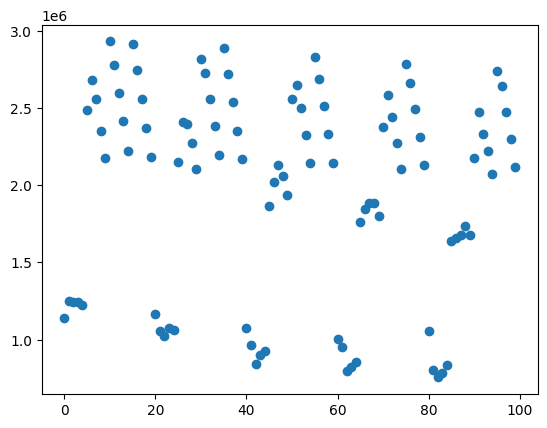

In [35]:
plt.scatter(range(100), auc_df["auc"])

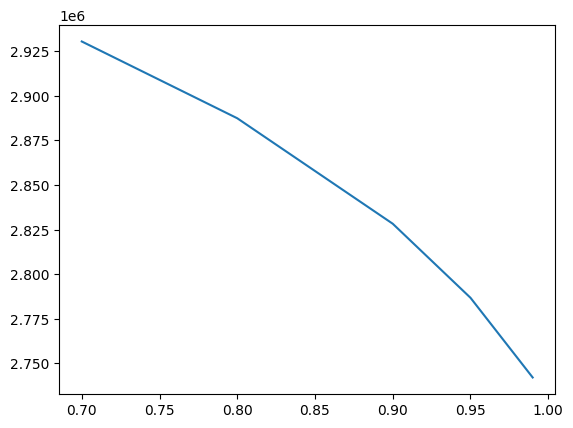

In [39]:
gamma_df = df.groupby(("gamma"))["auc"].max().reset_index()
plt.xlabel("Discount Factor")
plt.ylabel("AUC of rewards over ")
plt.plot(gamma_df["gamma"], gamma_df["auc"])

In [17]:
os.listdir("../../../results/gamma_0.7_lr_0.01_eps_decay_dur_300000_seed_0")

['results.pkl', 'results.json']